# NLP using RNNs in PyTorch

Welcome to Dinosaurus Island! Travel back 65 million years to a time when dinosaurs roamed the Earth. In this assignment, these prehistoric creatures have made a return, and you have been entrusted with a mission. Leading a team of biology researchers, you are tasked with creating new breeds of dinosaurs and giving them names. Your assistant has compiled a dataset containing a comprehensive list of dinosaur names. Your mission involves building a character-level language model using deep learning to generate fresh dinosaur names. The algorithm will learn distinct naming patterns and randomly generate new names. By the end of this assignment, you will achieve the following:

   * Store text data for processing using a Recurrent Neural Network (RNN).
   * Construct a character-level text generation model employing an RNN.
   * Sample novel sequences in an RNN to generate diverse dinosaur names.



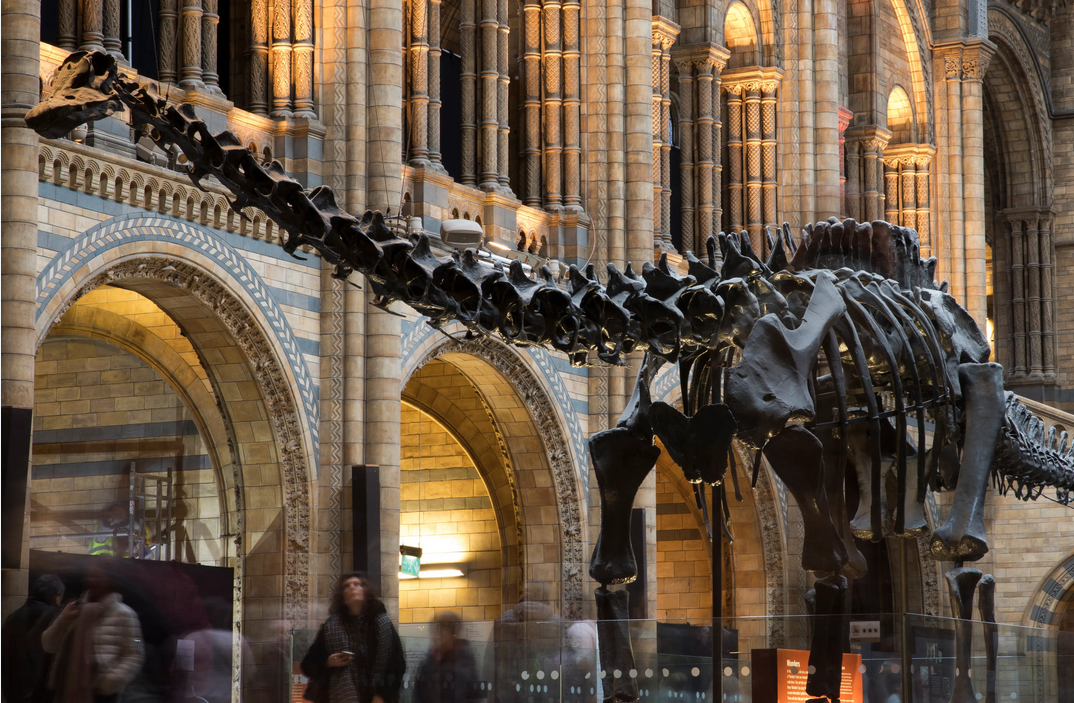

## Packages

We import the following libraries that are required for this assignment.

In [1]:
import random

import numpy as np

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torch.functional import F
from torch.utils.data import DataLoader

**For grading purposes, please do not import any other libraries**

As you go through the notebook, you will find **???** in certain places. Your job is to replace **???** with appropriate code or values and ensure that the notebook runs properly end-to-end.

## Dataset and Preprocessing


We will begin by obtaining and preparing our dataset. You can acquire the dataset we will be using from the attachments of Assignment 6 at NYU Brightspace. This data is provided in the `.txt` file called `dinos.txt`. The data is reasonably clean, simplifying the preprocessing steps. Select the folder tab on the right hand side and upload `dinos.txt`. Note that each time the runtime disconnects, you will need to upload the aforementioned file on the folder tab again.


Execute the code snippets below to read the dinosaur names dataset, convert it to lowercase, and determine the size of the dataset and the vocabulary.

In [2]:
data = open('dinos.txt', 'r').read()
data= data.lower()
data

'aachenosaurus\naardonyx\nabdallahsaurus\nabelisaurus\nabrictosaurus\nabrosaurus\nabydosaurus\nacanthopholis\nachelousaurus\nacheroraptor\nachillesaurus\nachillobator\nacristavus\nacrocanthosaurus\nacrotholus\nactiosaurus\nadamantisaurus\nadasaurus\nadelolophus\nadeopapposaurus\naegyptosaurus\naeolosaurus\naepisaurus\naepyornithomimus\naerosteon\naetonyxafromimus\nafrovenator\nagathaumas\naggiosaurus\nagilisaurus\nagnosphitys\nagrosaurus\nagujaceratops\nagustinia\nahshislepelta\nairakoraptor\najancingenia\najkaceratops\nalamosaurus\nalaskacephale\nalbalophosaurus\nalbertaceratops\nalbertadromeus\nalbertavenator\nalbertonykus\nalbertosaurus\nalbinykus\nalbisaurus\nalcovasaurus\nalectrosaurus\naletopelta\nalgoasaurus\nalioramus\naliwalia\nallosaurus\nalmas\nalnashetri\nalocodon\naltirhinus\naltispinax\nalvarezsaurus\nalwalkeria\nalxasaurus\namargasaurus\namargastegos\namargatitanis\namazonsaurus\nammosaurus\nampelosaurus\namphicoelias\namphicoelicaudia\namphisaurus\namtocephale\namtosaur

In [3]:
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print(f'The dataset contains {data_size} total characters and {vocab_size} unique characters.')

The dataset contains 19909 total characters and 27 unique characters.


Additional information about unique characters:
* The characters include `a-z` (26 characters) and the `"\n"` (newline character).
* In this task, the newline character `"\n"` serves a role akin to the `<EOS>` (End of Sentence) token, indicating the end of a dinosaur name.

We start preprocessing by loading the `dinos.txt`, tokenizing each name into a list of characters and appending the special `<EOS>` token to indicate the end of the sequence. The result is a list of tokenized names suitable for further processing, that is for building a character-level language model that is the purpose of this assignment.

In [4]:
def split_to_names(fname):
    EOS = "<EOS>"
    data = []

    with open(fname) as file:
        text = file.read().lower()

    names = text.splitlines()
    for i, name in enumerate(names):
        # Split names to chars and append the End of Sequence (EOS) Token
        ch_list = list(name) + [EOS]
        data.append(ch_list)
    return data

In [5]:
data_in_char = split_to_names("dinos.txt")

The first dinosaur name that read as **aachenosaurus** was tokenized as follows:

In [6]:
data_in_char[0]

['a', 'a', 'c', 'h', 'e', 'n', 'o', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']

**Q: Display a few more tokenized dinosaur names of your choice**

In [7]:
# -----------
# Graded Cell
# -----------
for i in range(5):
  print(data_in_char[i+1])

['a', 'a', 'r', 'd', 'o', 'n', 'y', 'x', '<EOS>']
['a', 'b', 'd', 'a', 'l', 'l', 'a', 'h', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']
['a', 'b', 'e', 'l', 'i', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']
['a', 'b', 'r', 'i', 'c', 't', 'o', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']
['a', 'b', 'r', 'o', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']


Adding the `<EOS>` token serves a crucial purpose when generating new names using a language model. The reason is that during training, the model learns to conclude a name with this token. When generating new names, the presence of this token signals the completion of a name. Without it, there would be ambiguity in determining when the model has finished generating a name, which can potentially lead to premature or delayed stopping.

In [8]:
char_vocab = ["<EOS>"] + sorted(chars)[1:]
char_to_ix = {ch: i for i, ch in enumerate(char_vocab)}
ix_to_char = {i: ch for ch, i in char_to_ix.items()}

Display `char_vocab`:

In [9]:
char_vocab

['<EOS>',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

Display `char_to_idx`:

In [10]:
char_to_ix

{'<EOS>': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

Display `ix_to_char`:

In [11]:
ix_to_char

{0: '<EOS>',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

Our vocabulary is now constructed, comprising a list encompassing all the unique characters, including the `<EOS>` special token. Moreover, we established two dictionaries:
*   `char_to_ix` is a dictionary that maps each character in the vocabulary to its corresponding index.
*   `ix_to_char` is a dictionary that maps each index to its corresponding character.

## Creating Data Loader

Our next task can be divided into two steps. Initially, we convert our data from strings to sequences of integers since our model exclusively comprehends numerical inputs. Next, we implement the logic of loading our data, employing PyTorch's `Dataset` and `DataLoader` classes. From Assignment 5 these two classes proved instrumental, efficiently managing the data preparation process for training our model.

In [12]:
def keys_to_values(keys, _map, default):
    return [_map.get(key, default) for key in keys]

The helper function `keys_to_values` converts a sequence of keys (in our case, characters or tokens) to their corresponding integer values using a provided mapping (`_map` that in our case will be `char_to_ix`).
*   `default`: A default value is generally used if a key is not found in the mapping. We will set `default="<?>"` in the rest of the notebook.




Recall how **aachenosaurus** was tokenized:

In [13]:
data_in_char[0]

['a', 'a', 'c', 'h', 'e', 'n', 'o', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']

**Sanity check: conversion of aachenosaurus**:

In [14]:
keys_to_values(data_in_char[0], char_to_ix, "<?>")

[1, 1, 3, 8, 5, 14, 15, 19, 1, 21, 18, 21, 19, 0]

**Q: Convert a few more dinosaur names of your choice**

In [15]:
# -----------
# Graded Cell
# -----------
for i in range(5):
  print(data_in_char[i+1])
  print(keys_to_values(data_in_char[i+1], char_to_ix, "<?>"))

['a', 'a', 'r', 'd', 'o', 'n', 'y', 'x', '<EOS>']
[1, 1, 18, 4, 15, 14, 25, 24, 0]
['a', 'b', 'd', 'a', 'l', 'l', 'a', 'h', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']
[1, 2, 4, 1, 12, 12, 1, 8, 19, 1, 21, 18, 21, 19, 0]
['a', 'b', 'e', 'l', 'i', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']
[1, 2, 5, 12, 9, 19, 1, 21, 18, 21, 19, 0]
['a', 'b', 'r', 'i', 'c', 't', 'o', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']
[1, 2, 18, 9, 3, 20, 15, 19, 1, 21, 18, 21, 19, 0]
['a', 'b', 'r', 'o', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']
[1, 2, 18, 15, 19, 1, 21, 18, 21, 19, 0]


Let us proceed by creating a Python class that inherits from the `Dataset` class in PyTorch. This class is designed to retrieve samples from our preprocessed data.

*   In the `__init__` method, we take our preprocessed data and convert each character to its correponding integer value using a provided mapping (`char_to_ix` in our case). This ensures that our data is in a format that the model can comprehend.
*   The `__len__` method, which involves using the `len` built-in function on our data, returns the size of the data.
*   The `__get_item__` method automatically receives an index we are interested in as an argument. We retrieve the sample at the index in our data, slice out both `x` (from the first to the second-to-last value) and `y` (from the second to the last value) from the sample, convert them to tensors, and return them.

Below you can run the code snippet to see the format of the inputs `x` and targets `y` that are going to be fed in our character-level language model during training. Retrieving the first sample in our data, i.e. `data_in_char[0]`, `x` and `y` are:

In [16]:
print(data_in_char[0][:-1]) # Input x
print(data_in_char[0][1:]) # Target y

['a', 'a', 'c', 'h', 'e', 'n', 'o', 's', 'a', 'u', 'r', 'u', 's']
['a', 'c', 'h', 'e', 'n', 'o', 's', 'a', 'u', 'r', 'u', 's', '<EOS>']


**Q: Fill each of the ??? with a single line of code**

In [17]:
# -----------
# Graded Cell
# -----------
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_as_str, _map):
        self.data_as_int = []

        # Convert characters to integers
        for seq_as_str in data_as_str:
            seq_as_int = keys_to_values(seq_as_str, _map, random.choice(list(_map)))
            self.data_as_int.append(seq_as_int)

    def __len__(self):
        return len(self.data_as_int)

    def __getitem__(self, ix):
        # Get data sample at index ix
        item = self.data_as_int[ix]

        # Slice x and y from sample
        x = item[:-1]
        y = item[1:]
        # Convert x and y to tensors and return them
        return torch.tensor(x), torch.tensor(y)

This entire process ensures that our data is well-prepared for training our model using PyTorch's `Dataset` and `DataLoader` classes. To complete the setup, we configure the `DataLoader` with a mini-batch size of 1 and shuffling for enhanced randomness during training.

In [18]:
dataset = Dataset(data_in_char, char_to_ix)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

Now, with these preparations complete, we are poised to move forward and focus on developing our model.

## Building the Language Model

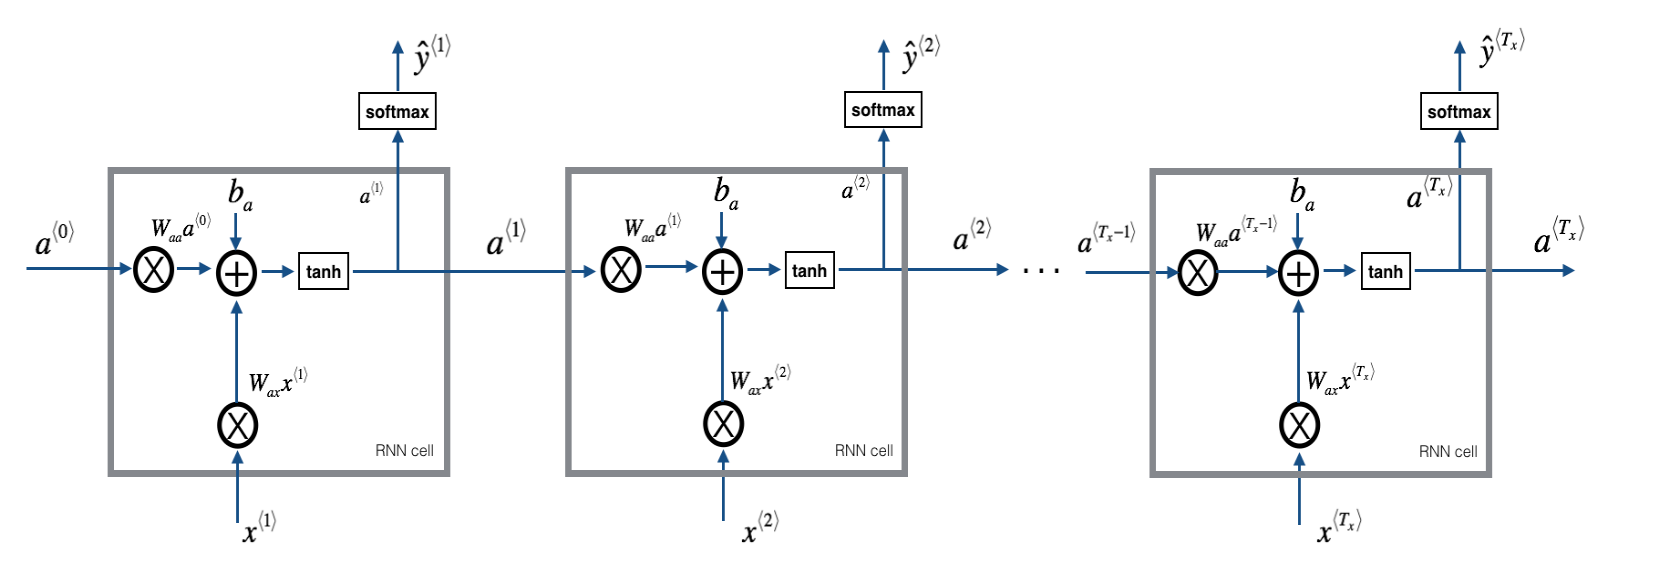

**Figure: Standard Recurrent Neural Network. Note that in the class we have not adopted Andrew Ng's notation for the outputs of the softmax layers and insisted on using `p` instead.**

Our model is pretty standard. It starts with an RNN layer, followed by a Linear (fully connected) layer. The RNN layer together with the Linear layer are responsible for predicting the next character given a sequence of characters.

Upon establishing the layers, the next step is to propagate forward. The `forward` method receives `x` as an input along with the prior state of the model. The resulting output is then passed to the fully connected layer. The method conludes by returning the model's prediction and the updated state.

The `init_state` method is responsible for initializing the state of the model. It returns a tensor of zeros with dimensions specified by the number of layers (`self.n_layers`), mini-batch size (`b_size`), and hidden size (`self.hidden_size`). The default mini-batch size is set to 1.

**Q: Fill in the ??? in the next Graded Cell. PyTorch documentation for your reference: [RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)**

In [19]:
# -----------
# Graded Cell
# -----------
class Model(nn.Module):
    def __init__(self, _map, hidden_size, n_layers=1):
        super(Model, self).__init__()

        self.vocab_size = len(char_vocab) # Size of the vocabulary
        self.hidden_size = hidden_size # Number of features in the hidden state
        self.n_layers = n_layers # Number of recurrent layers (Default: 1 as in the class)

        self.rnn = nn.RNN(
            input_size=self.vocab_size,
            hidden_size=self.hidden_size,
            num_layers=self.n_layers,
            batch_first=True
        )

        self.fc = nn.Linear(
            in_features=self.hidden_size,
            out_features=self.vocab_size
        )

    def forward(self, x, prev_state):

        out, state = self.rnn(x, prev_state) # Pass the input along with the prior state through the RNN layer

        out = self.fc(out) # Pass the resulting output through the fc layer
        return out, state # Return the model's prediction and the updated state

    def init_state(self, b_size=1):
        return torch.zeros(self.n_layers,b_size,self.hidden_size) # Initialize the state of the model with a tensor of zeros

Let us now instantiate Model with `hidden_size=64`.

In [20]:
model = Model(char_to_ix, 64, n_layers=1)
model

Model(
  (rnn): RNN(27, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=27, bias=True)
)

## Training and Inference

The training process in PyTorch typically adheres to a consistent pattern, irrespective of the specific task. Here's an overview of the key steps we follow:

* **Zeroing the gradients**: Initially, we reset the gradients of the model's parameters to zero. This is a crucial step to avoid accumulating gradients from previous iterations.
* **State initialization and forward pass**: We initialize the state of our model and execute a forward pass through it. This entails processing input data to generate predictions.
* **Loss Calculation and Backward Pass**: We compute the loss by comparing the model's predictions with the actual target values. Loss values at each iteration are recorded and stored in a list for further analysis. We then perform a backward pass through the model to calculate the gradients.
* **Gradient clipping**: When gradients are very large, they are called "exploding gradients". Exploding gradients make the training process more difficult, because the updates may be so large that they "overshoot" the optimal values during the backward pass. Before updating the parameters, we will perform gradient clipping using [`torch.nn.utils.clip_grad_norm_`](https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html). Refer to the link for the documentation.
* **Parameter update**: We update our model's parameters using the Adam optimizer.
* **Inference**: Every 1000 steps of stochastic gradient descent, we will sample several randomly chosen names to see how the algorithm is doing.

This cyclic process is repeated iteratively, refining the model's understanding and improving its ability to generate meaningful sequences.

In [21]:
def sample_next(model, x, prev_state, uniform=True):
    # Perform forward-prop and get the output of the last time-step from the first sequence in the batch
    out, state = model(x, prev_state)
    last_out = out[0, -1, :]

    # Get the softmax of the output of the last-time step and sample
    p = None if uniform else F.softmax(last_out, dim=-1).numpy()
    sampled_ix = np.random.choice(last_out.shape[0], p=p)
    return sampled_ix, state

In summary, the code above is responsible for sampling the next character index based on the model's output probabilities. The uniform flag allows you to choose between uniform random sampling (`p=None`) or sampling based on softmax probabilities. Now, we can build the main sample function that we are going to use for inference.


In [22]:
def sample(model, seed, uniform=True, max_seqlen=20, stop_on=None):
    seed = seed if isinstance(seed, (list, tuple)) else [seed]

    model.eval()
    with torch.no_grad():
        sampled_ix_list = seed[:]
        x = torch.tensor([seed])

        # One-hot encode the seed
        x_onehot = F.one_hot(x, num_classes=model.vocab_size).float()

        prev_state = model.init_state(b_size=1)
        for t in range(max_seqlen - len(seed)):
            sampled_ix, prev_state = sample_next(model, x_onehot, prev_state, uniform)

            sampled_ix_list.append(sampled_ix)
            x = torch.tensor([[sampled_ix]])

            # One-hot encode the sampled_ix
            x_onehot = F.one_hot(x, num_classes=model.vocab_size).float()

            if sampled_ix == stop_on:
                break

    model.train()
    return sampled_ix_list

Let's break down how our main sample function works.

*   The function initializes with a seed, which can be a single character or a list/tuple of characters.
*   The model is set to evaluation mode using `model.eval()`.
*   The seed is converted to a PyTorch tensor and is one-hot encoded.
*   The model's initial state is initialized.
*   The function iterates to generate the sequence, sampling the next index at each step using the `sample_next()` function previously defined.
*   The sampled indices are appended to the list.
*   The stop condition is checked, and if met, the iteration breaks.
*   The model is set back to training mode with `model.train()`.
*  The list of sampled indices is returned.

This function essentially generates a sequence by repeatedly sampling the next character based on the model's predictions, incorporating randomness for diversity in the generated samples. The process stops either when a specified token is encountered or when the sequence reaches the maximum specified length. In the function below the process stops either when `<EOS>` is encountered or when the sequence reaches maximum specified length equal to 20.


**Q: Fill in the ??? in the next Graded Cell filling each ??? encountered with one line of code**

In [23]:
# -----------
# Graded Cell
# -----------
def train(model, data, num_iter, criterion, clip=0.25, lr=0.001):
    model.train() # Set the model to training mode

    costs = []
    running_loss = 0
    optimizer = torch.optim.Adam(model.parameters(), lr=lr) # Choose the Adam optimizer

    curr_iter = 0
    while curr_iter < num_iter:
        for x, y in data:

            optimizer.zero_grad() # Zero the gradients

            # One-hot encode the input sequence x
            x_onehot = F.one_hot(x, num_classes=model.vocab_size).float()

            b_size = x.size(0)
            prev_state = model.init_state(b_size=b_size) # Initialize model's state
            out, state = model.forward(x_onehot, prev_state) # Perform forward propagation
            # The shape of out is (b_size, sequence_length, num_classes)
            # ^ CAREFUL HERE

            # Calculate loss
            loss = criterion(out.transpose(1, 2), y) # Swap dimensions 1 and 2 because CE loss expects the input tensor to have shape (b_size, sequence_length, num_classes)
            costs.append(loss.item())
            running_loss += loss.item()

            # Calculate gradients and update parameters
            loss.backward() # Perform back propagation
            if clip:
                torch.nn.utils.clip_grad_norm_(model.parameters(), clip) # Clip the gradients
            optimizer.step() # Update the parameters

            curr_iter += 1

            # Display the (average) loss every 1000 epochs
            if curr_iter % 1000 == 0:
                print("Iteration: {}/{}, Loss: {:8.4f}".format(
                    curr_iter, num_iter,
                    running_loss / float(1000))) # Average loss
                running_loss = 0

                # Generate and display 7 samples every 1000 epochs
                print("\nGenerated Samples at Iteration:", curr_iter)
                for i in range(7):
                    seed = random.choice(list(char_to_ix.values())[1:])
                    generated_name = "".join(keys_to_values(
                        sample(model, seed, False, 20, char_to_ix["<EOS>"]), # False stands for sampling based on softmax probs
                        ix_to_char, "<?>"))
                    print(f"Sample {i+1}: {generated_name}")

            if curr_iter >= num_iter:
                break
    return model, costs


When you run the following cell, you should observe your model outputting random-looking characters at the first iteration. After a few thousand iterations, your model should learn to generate reasonable-looking dinosaur names.


Iteration: 1000/50000, Loss:   2.2859

Generated Samples at Iteration: 1000
Sample 1: esaorosysaur<EOS>
Sample 2: garokop<EOS>
Sample 3: nihoceroauros<EOS>
Sample 4: opillovsousus<EOS>
Sample 5: jrcs<EOS>
Sample 6: fkoghazten<EOS>
Sample 7: nodosaurus<EOS>
Iteration: 2000/50000, Loss:   1.9313

Generated Samples at Iteration: 2000
Sample 1: lntseurus<EOS>
Sample 2: pacchasaurus<EOS>
Sample 3: vacamestorus<EOS>
Sample 4: rurapen<EOS>
Sample 5: kannhesaurul<EOS>
Sample 6: konmhosaurus<EOS>
Sample 7: nuaxncangopavaus<EOS>
Iteration: 3000/50000, Loss:   1.8398

Generated Samples at Iteration: 3000
Sample 1: yfuchylelopegpa<EOS>
Sample 2: belioylus<EOS>
Sample 3: uliitononacola<EOS>
Sample 4: yelikkusvun<EOS>
Sample 5: ufilton<EOS>
Sample 6: abechadasaurus<EOS>
Sample 7: ilitangodosaurus<EOS>
Iteration: 4000/50000, Loss:   1.7757

Generated Samples at Iteration: 4000
Sample 1: haseosaurus<EOS>
Sample 2: qnyosluresaurus<EOS>
Sample 3: typaoponkusuu<EOS>
Sample 4: lenodosaurus<EOS>
Sample 5: 

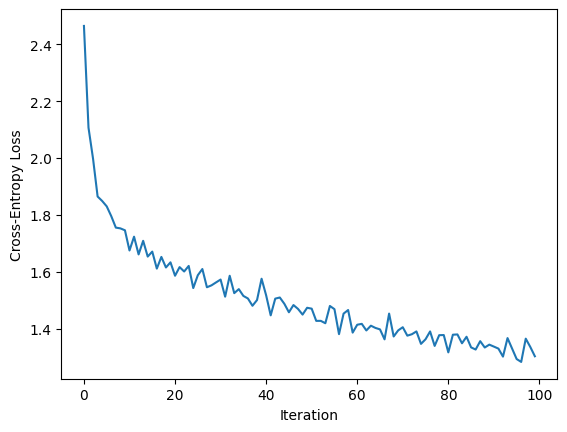

In [24]:
# Set criterion to be the CE loss
criterion = nn.CrossEntropyLoss()

# Train the model
model, costs = train(model, dataloader, 50000, criterion, clip=0.25, lr=0.001)

# Plot cumulative costs
cum = 500
plt.xlabel("Iteration")
plt.ylabel("Cross-Entropy Loss")
plt.plot([sum(costs[i:i + cum]) / cum for i in range(0, len(costs), cum)])


## Conclusion

The evolution of your algorithm is evident as it transitions from generating random characters initially to crafting plausible dinosaur names with intriguing endings towards the end of training. While the early stages may have produced seemingly random strings, the model refines its understanding over time. Notably, your model likely grasped the pattern that dinosaur names often conclude with suffixes such as saurus, don, raptor, din etc. For enhanced results, feel free to experiment with extended training periods and adjust hyperparameters to further fine-tune your model. Given the relatively small dataset used in this assignment, the training process is swift, even on a CPU.


## Appendix: Preprocessing with Padding and Training in Batches

Padding is a technique used in NLP tasks to ensure that input sequences have a consistent length. In NLP, text data is usually represented as sequences of words or characters. However, these sequences can have variable lengths. When processing data in batches, it's necessary to have consistent input dimensions to perform parallel computations efficiently.

Padding involves adding another special token, the `<PAD>` token (subsequently mapped to 0 using one of the vocabularies below) to the sequence of characters to convert them from variable-length to fixed-length.

In [25]:
char_vocab = ["<PAD>"] + sorted(chars)[1:] + ["<EOS>"]
char_to_ix = {ch: i for i, ch in enumerate(char_vocab)}
ix_to_char = {i: ch for ch, i in char_to_ix.items()}

In [26]:
char_vocab

['<PAD>',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '<EOS>']

In [27]:
char_to_ix

{'<PAD>': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '<EOS>': 27}

In [28]:
ix_to_char

{0: '<PAD>',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 27: '<EOS>'}

Observe that now the index 0 correponds to `<PAD>` while the index 27 corresponds to `<EOS>`, and we have 28 unique characters in our vocabulary.

The provided function below serves as the collate function for creating batches in the context of a training setup. In deep learning, a collate function is used to define how individual samples are combined to form batches. As we mentioned earlied, such an operation is especially useful when working with sequences of variable lengths, such as in NLP tasks.

In [29]:
from torch.nn.utils.rnn import pad_sequence

def dino_collate_fn(batch):
  list_of_xs = [] # List to store input sequences
  list_of_ys = [] # List to store target sequences
  # Iterate through each sample in the batch
  for x, y in batch:
    list_of_xs.append(x) # Append the input sequence
    list_of_ys.append(y) # Append the target sequence
  # Use pad_sequence to pad sequences in the mini-batch to the same length
  return (
      pad_sequence(list_of_xs, batch_first=True, padding_value=char_to_ix["<PAD>"]),
      pad_sequence(list_of_ys, batch_first=True, padding_value=char_to_ix["<PAD>"])
  )

Now, we are going to create a new dataset and load it using `DataLoader` with a mini-batch size equal to 3.

In [30]:
dataset = Dataset(data_in_char, char_to_ix)
batched_dataloader = DataLoader(dataset, batch_size=3, shuffle=True, collate_fn=dino_collate_fn)

Let us display the first two batches (of size 3) of targets and inputs, first converted and secondly before conversion.

In [31]:
batch = next(iter(batched_dataloader))
print(batch[0])
print(batch[1])
print(["".join([ix_to_char[x] for x in batch[0][i].tolist()]) for i in range(len(batch[0]))])
["".join([ix_to_char[x] for x in batch[1][i].tolist()]) for i in range(len(batch[0]))]

tensor([[19, 20,  5,  7, 15, 19,  1, 21, 18,  9,  4,  5, 19],
        [ 8,  9, 18, 15, 14, 15, 19,  1, 21, 18, 21, 19,  0],
        [ 3,  1, 13,  1, 18,  1, 19,  1, 21, 18, 21, 19,  0]])
tensor([[20,  5,  7, 15, 19,  1, 21, 18,  9,  4,  5, 19, 27],
        [ 9, 18, 15, 14, 15, 19,  1, 21, 18, 21, 19, 27,  0],
        [ 1, 13,  1, 18,  1, 19,  1, 21, 18, 21, 19, 27,  0]])
['stegosaurides', 'hironosaurus<PAD>', 'camarasaurus<PAD>']


['tegosaurides<EOS>', 'ironosaurus<EOS><PAD>', 'amarasaurus<EOS><PAD>']

It is time now to instantiate a new model.

In [32]:
model = Model(char_to_ix, 64, n_layers=1)
model

Model(
  (rnn): RNN(28, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=28, bias=True)
)

Run the code snippet below to display the losses and sample 7 new dinosaur names every 1000 iterations as well as visualize the cumulative costs.

Iteration: 1000/50000, Loss:   2.1501

Generated Samples at Iteration: 1000
Sample 1: yauseion<EOS>
Sample 2: ploisauran<EOS>
Sample 3: necayosiurus<EOS>
Sample 4: paneonapsaurur<EOS>
Sample 5: rracisalius<EOS>
Sample 6: drhagonsaurus<EOS>
Sample 7: itavriaurus<EOS>
Iteration: 2000/50000, Loss:   1.7969

Generated Samples at Iteration: 2000
Sample 1: banjalur<EOS>
Sample 2: atarhoropter<EOS>
Sample 3: macqavesaupus<EOS>
Sample 4: zangdosaurus<EOS>
Sample 5: xatigandisausus<EOS>
Sample 6: rumileycora<EOS>
Sample 7: salbasaurus<EOS>
Iteration: 3000/50000, Loss:   1.6975

Generated Samples at Iteration: 3000
Sample 1: peibiredeus<EOS>
Sample 2: qurimosaurus<EOS>
Sample 3: querosaurus<EOS>
Sample 4: podrosaurus<EOS>
Sample 5: quringorius<EOS>
Sample 6: melcakosaurus<EOS>
Sample 7: felocheiphos<EOS>
Iteration: 4000/50000, Loss:   1.6416

Generated Samples at Iteration: 4000
Sample 1: urygaosaurus<EOS>
Sample 2: hatrasyurus<EOS>
Sample 3: luchenorapngsus<EOS>
Sample 4: eantorsus<EOS>
Sample 

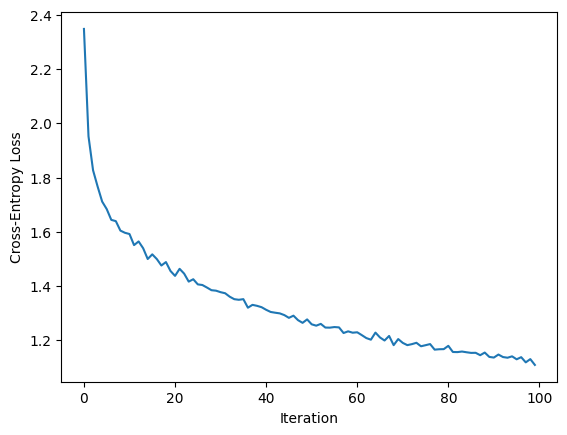

In [33]:
# Set criterion to be the CE loss
criterion = nn.CrossEntropyLoss(ignore_index=0)

# Train the model
model, costs = train(model, batched_dataloader, 50000, criterion, clip=0.25, lr=0.001)

# Plot cumulative costs
cum = 500
plt.xlabel("Iteration")
plt.ylabel("Cross-Entropy Loss")
plt.plot([sum(costs[i:i + cum]) / cum for i in range(0, len(costs), cum)])

**Q: Briefly elaborate on why it is more advantageous training with a mini-batch size that is strictly bigger than 1**

???

In [34]:
"""
Training with a mini-batch size larger than 1 is advantageous as it improves computational efficiency
by enabling parallel processing, unlocking the compute potential of GPUs. It also offers more stable
and accurate gradient estimations. This phenomenon is seen in the two cross-entropy loss plots. The
first plot (mini-batch size = 1) fluctuates more from the downwards trend than the second plot
(mini-batch size = 3). Additionally, larger batch sizes better utilize memory bandwidth and
provide a regularization effect by introducing noise in gradient calculations, further aiding in
avoiding overfitting. Overall, a mini-batch size strictly bigger than 1 provides a balance of speed,
stability, and hardware optimization.
"""

'\nIf the mini-batch size is 1, the stochastic gradient descent is like a drunk man walking\n'